<h1 align="center"> Principle Component Analysis (PCA) for Data Visualization </h1>

Baseado em : https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

Link do vídeo: https://www.youtube.com/watch?v=uZJlvD7tD2c&feature=youtu.be

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [19]:
colunas = ['s_length',
           's_width',
           'p_length',
           'p_width',
           'y']

In [5]:
df = pd.read_csv('iris.data', names=colunas)

In [6]:
df.head()

,s_length,s_width,p_length,p_width,y
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
features = ['s_length',
           's_width',
           'p_length',
           'p_width',]
x = df.loc[:, features].values

In [9]:
y = df.loc[:,['y']].values

In [10]:
x = StandardScaler().fit_transform(x)

In [11]:
pd.DataFrame(data = x, columns = features).head()

,s_length,s_width,p_length,p_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [12]:
pca = PCA(n_components=2)

In [13]:
principalComponents = pca.fit_transform(x)

In [14]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [15]:
principalDf.head(5)

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [16]:
df[['y']].head()

,y
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [18]:
finalDf = pd.concat([principalDf, df[['y']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,y
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


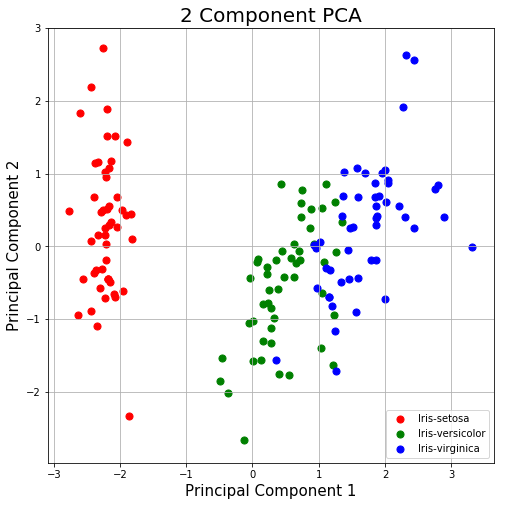

In [21]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['y'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()